In [57]:
import pandas as pd

first_file = pd.read_csv("1-2-3_test.csv")
second_file = pd.read_csv("2-3-4_test.csv")

# # print("Score:{}, Topic:{}, Lemmas in Story:{}, Actual Words in Story:{}"
#       .format(first_file.iloc[2507, 23], first_file.iloc[0, 23], 
#               first_file.iloc[2507, -2], first_file.iloc[2507, -4]))
# # print("Score:{}, Topic:{}, Lemmas in Story:{}, Actual Words in Story:{}"
#       .format(first_file.iloc[7, 37], first_file.iloc[0, 37], 
#               first_file.iloc[7, -2], first_file.iloc[7, -4]))




In [5]:
def retrieveStory(file, row, column):
    file = pd.read_csv(file)
    score = file.iloc[row, column]
    topic = file.iloc[0, column]
    lemmas_in_story = file.iloc[row, -2]
    number_of_lemmas = file.iloc[row, -1]
    actual_words_in_story = file.iloc[row, -4]
    number_of_actual_words = file.iloc[row, -3]
#     print("Score: {}, Topic: {}, Number of Actual Words: {}, Actual Words in Story: {},Lemmas in Story: {}, Number of Lemmas: {}"
#           .format(score, topic, number_of_actual_words, actual_words_in_story, lemmas_in_story, number_of_lemmas))
    return score, lemmas_in_story, number_of_lemmas

In [31]:
a = retrieveStory("1-2-3_test.csv", 2507, 23)
a[0]

'0.805811958282'

In [23]:
retrieveStory("1-2-3_test.csv", 7, 37)

Score: 0.744977864801, Topic: isis-inspired ocean indian Air hatch Malaysia soldier re-air attackers discovery, Number of Actual Words: 10, Actual Words in Story: ['And', 'Indian', 'Ocean', 'sad', 'discovery', 'part', 'missing', 'Malaysia', 'Air', 'flight'],Lemmas in Story: ['indian', 'ocean', 'sad', 'discovery', 'part', 'miss', 'Malaysia', 'Air', 'flight'], Number of Lemmas: 9


"['indian', 'ocean', 'sad', 'discovery', 'part', 'miss', 'Malaysia', 'Air', 'flight']"

In [3]:
#retrieveStory("1-2-3_test.csv", 947, 67)

In [149]:
#retrieveStory("2-3-4_test.csv", 1081, 63)

In [150]:
#retrieveStory("2-3-4_test.csv", 1159, 63)

In [153]:
#retrieveStory("2-3-4_test.csv", 2150, 96)

In [151]:
#retrieveStory("2-3-4_test.csv", 2318, 10)


In [7]:
retrieveStory("2-3-4_test.csv", 2583, 11)

('0.806684037195',
 "['show', 'many', 'watch', 'netflix', 'series', 'cause', 'wave', 'online', 'offline', 'celebrate', 'tweet', 'people', 'sign', 'petition', 'concern', 'people', 'basically', 'fire', 'make', 'murderer', 'unlike', 'orange', 'new', 'black', 'house', 'card', 'series', 'real', 'people', 'actual', 'event', 'make', 'murderer', 'begin', 'exoneration', 'o', 'Steven', 'Avery', 'man', 'just', 'serve', '18', 'year', 'prison', 'rape', 'convict', 'two', 'year', 'later', 'release', 'charge', 'another', 'crime', 'time', 'gruesome', 'murder', 'young', 'woman', 'ten-part', 'steery', 'follow', 'tt', 'murder', 'trial', 'viewer', 'leave', 'wonder', 'join', 'talk', 'Emily', 'Longeretta', 'absolutely', 'make', 'riveting', 'think', 'interesting', 'thing', 'really', 'real', 'case', 'sight', 'never', 'see', 'like', 'say', 'bring', 'orange', 'new', 'black', 'show', 'base', 'real', 'case', 'something', 'see', 'time', 'show', 'side', 'court', 'really', '100', '%', 'kind', 'scary', 'see', 'many', 

20
9
33
28
34
25
50
299


In [154]:
first_story = retrieveStory("1-2-3_test.csv", 2507, 23)[1]
second_story = retrieveStory("1-2-3_test.csv", 7, 37)[1]
third_story = retrieveStory("1-2-3_test.csv", 947, 67)[1]
fourth_story = retrieveStory("2-3-4_test.csv", 1081, 63)[1]
fifth_story = retrieveStory("2-3-4_test.csv", 1159, 63)[1]
sixth_story = retrieveStory("2-3-4_test.csv", 2150, 96)[1]
seventh_story = retrieveStory("2-3-4_test.csv", 2318, 10)[1]
eighth_story = retrieveStory("2-3-4_test.csv", 2583, 11)[1]

In [155]:
from textblob import TextBlob
def sentimentAnalysis(story):
    blob = TextBlob(story)
    for sentence in blob.sentences:
        return sentence.sentiment

In [156]:
stories = [first_story, second_story, third_story, fourth_story, fifth_story, sixth_story, seventh_story, eighth_story]
story_sentiments = [sentimentAnalysis(story) for story in stories]

In [50]:
import sqlite3
conn = sqlite3.connect('test.db')
c = conn.cursor()
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS myTable(id REAL, lda_score REAL, lemmas TEXT, number_of_lemmas REAL, polarity_score REAL, subjectivity_score REAL)')

create_table()


In [51]:
c.execute("INSERT INTO myTable(id, lda_score, lemmas, number_of_lemmas, polarity_score, subjectivity_score) VALUES(?, ?, ?, ?, ?, ?)", 
          (1, retrieveStory("1-2-3_test.csv", 2507, 23)[0], retrieveStory("1-2-3_test.csv", 2507, 23)[1],
           retrieveStory("1-2-3_test.csv", 2507, 23)[2], story_sentiments[0][0], story_sentiments[0][1]))

c.execute("INSERT INTO myTable(id, lda_score, lemmas, number_of_lemmas, polarity_score, subjectivity_score) VALUES(?, ?, ?, ?, ?, ?)", 
          (2, retrieveStory("1-2-3_test.csv", 7, 37)[0], retrieveStory("1-2-3_test.csv", 7, 37)[1],
           retrieveStory("1-2-3_test.csv", 7, 37)[2], story_sentiments[1][0], story_sentiments[1][1]))

c.execute("INSERT INTO myTable(id, lda_score, lemmas, number_of_lemmas, polarity_score, subjectivity_score) VALUES(?, ?, ?, ?, ?, ?)", 
          (3, retrieveStory("1-2-3_test.csv", 947, 67)[0], retrieveStory("1-2-3_test.csv", 947, 67)[1],
           retrieveStory("1-2-3_test.csv", 947, 67)[2], story_sentiments[2][0], story_sentiments[2][1]))
conn.commit()

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
new_file = first_file.drop(first_file.index[0])
new_file.shape


(3097, 105)

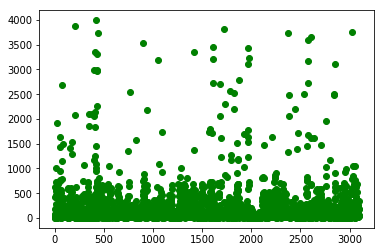

In [144]:
row = new_file.iloc[0]

plt.scatter(range(0,3097), new_file['-4'], c = 'green')
